# Final Project

## Loading libraries and Dataset

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import re, string
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("/Users/Lenovo/Desktop/Education/Winter term/COSC-274/dartmouth-cosc-74274-w23-session1-part1/training.csv")

test_df = pd.read_csv("/Users/Lenovo/Desktop/Education/Winter term/COSC-274/dartmouth-cosc-74274-w23-session1-part1/test.csv")

print(train_df.shape)
print(test_df.shape)

(29189, 13)
(4500, 12)


In [3]:
train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,2.0,NaN,{'Size:': ' Polaris H4'},automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,NaN,NaN,NaN,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,NaN,NaN,NaN,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,NaN,NaN,"{'Color:': ' Clear', 'Style:': ' 45 Degree'}",automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,NaN,NaN,NaN,automotive


## Check for Missing Values

In [4]:
train_df.isna().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          4
reviewText            0
summary               5
unixReviewTime        0
vote              23142
image             28589
style             13824
category              0
dtype: int64

In [5]:
na_vote = train_df['vote'].isna().sum()/len(train_df['vote'])
image_na = train_df['image'].isna().sum()/len(train_df['image'])
style_na = train_df['style'].isna().sum()/len(train_df['style'])

print("Missing Values in Vote : {}".format(na_vote))
print("Missing Values in Image : {}".format(image_na))
print("Missing Values in Style : {}".format(style_na))

Missing Values in Vote : 0.792832916509644
Missing Values in Image : 0.9794443112131282
Missing Values in Style : 0.47360306964952553


## Removing Unnecessary Columns

In [6]:
train_df = train_df.drop('vote', axis=1)
train_df = train_df.drop('image', axis=1)
train_df = train_df.drop('style', axis=1)

train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,automotive


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29189 entries, 0 to 29188
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         29189 non-null  int64 
 1   verified        29189 non-null  bool  
 2   reviewTime      29189 non-null  object
 3   reviewerID      29189 non-null  object
 4   asin            29189 non-null  object
 5   reviewerName    29185 non-null  object
 6   reviewText      29189 non-null  object
 7   summary         29184 non-null  object
 8   unixReviewTime  29189 non-null  int64 
 9   category        29189 non-null  object
dtypes: bool(1), int64(2), object(7)
memory usage: 2.0+ MB


## Data Processing

1. The **overall** column is our target variable and it contains numbers from 1 to 5, so based on certain thresholds we will create a new column and put in values like Good, Bad, etc for binary classification.
2. We will then apply some basic NLP techniques in **reviewText** column to get important features.

In [8]:
train_df['productReview'] = train_df['overall'].apply(lambda z: 0 if z <=2 else 1)
train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,productReview
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,automotive,0
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,automotive,0
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,automotive,0
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,automotive,0
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,automotive,0


In [9]:
train_df = train_df.dropna()

## Checking Class Distribution

We will explore the class distribution of **productReview** column to see whether the dataset is imbalanced or not, based on this we will apply the cross-validation techniques.

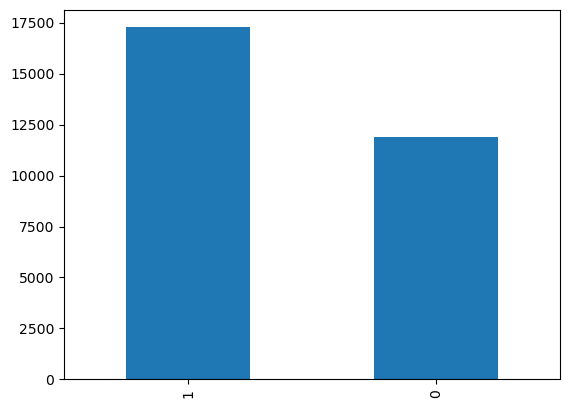

In [10]:
binary_labels = train_df['productReview'].value_counts()

binary_labels.plot.bar()
plt.show()

In [11]:
binary_labels[0]/binary_labels[1]

0.689830901088719

There seems to be a moderate imbalance in the dataset, in that for every 68 samples observed in label 0 there were 100 samples in label 1

In [12]:
## preprocess the dataset

def preprocessing(t):
    t = t.lower()
    
    #removing punctuations
    t = t.translate(str.maketrans('','',string.punctuation))
    
    #removing digits
    t = re.sub(r'\d','', t)
    
    #removing whitespaces
    t = t.strip()
    
    return t

train_df['reviewText'] = train_df['reviewText'].apply(preprocessing)

In [13]:
train_df['reviewText']

0             all of the reviews for this product are fake
1                                     wrong part our fault
2                            this wire set it really sucks
3        first use it leaked instantly even at  bucks i...
4                                                didnt fit
                               ...                        
29184    this is the same plush toy that the official d...
29185    my grandson loved this it is a great toy he pl...
29186    my kiddo loves them we are a rock climbing fam...
29187    i bought this for my niece age  and mailed it ...
29188    my daughter will love this shes a huge ninja t...
Name: reviewText, Length: 29180, dtype: object

In [14]:
stop_words = ['a', 'an', 'the', 'and', 'but', 'or', 'if', 'because', 'as', 'at', 
              'by', 'for', 'from', 'in', 'into', 'of', 'off', 'on', 
              'onto', 'out', 'over', 'to', 'up', 'with']

In [15]:
train_df['reviewText'] = train_df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Binary Classification

In [16]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

x = train_df['reviewText']
y = train_df['productReview']

tfidf = TfidfVectorizer()
# counts = CountVectorizer(lowercase=True, stop_words = 'english')

# x_transformed = tfidf.fit_transform(x)


# x_transformed = cv.fit_transform(x)

x_transformed = tfidf.fit_transform(x)

## Logistic Regression

In [17]:
xtrain, xval, ytrain, yval = train_test_split(x_transformed, y, test_size=0.2, random_state=0)

In [18]:
# Model 1
lr_params = {'C':[0.2,0.4,0.6,0.8,1], 'class_weight':['balanced'], 'penalty':['l1','l2']}
lr = LogisticRegression()
grid_lr_model = GridSearchCV(lr, lr_params,cv=5, scoring="f1_macro")
grid_lr_model.fit(x_transformed,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [19]:
# scores = cross_val_score(model, x_transformed, y, cv=5, error_score='raise')
# scores.mean()

print('Best Score : {}'.format(grid_lr_model.best_score_))
print("Best Parameter : {}".format(grid_lr_model.best_params_))

Best Score : 0.7624165591349173
Best Parameter : {'C': 0.6, 'class_weight': 'balanced', 'penalty': 'l2'}


In [19]:
print(grid_lr_model.cv_results_['params'])
print(grid_lr_model.cv_results_['mean_test_score'])

[{'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l1'}, {'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l2'}, {'C': 0.4, 'class_weight': 'balanced', 'penalty': 'l1'}, {'C': 0.4, 'class_weight': 'balanced', 'penalty': 'l2'}, {'C': 0.6, 'class_weight': 'balanced', 'penalty': 'l1'}, {'C': 0.6, 'class_weight': 'balanced', 'penalty': 'l2'}, {'C': 0.8, 'class_weight': 'balanced', 'penalty': 'l1'}, {'C': 0.8, 'class_weight': 'balanced', 'penalty': 'l2'}, {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}, {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}]
[       nan 0.75660203        nan 0.75993876        nan 0.76241656
        nan 0.7621469         nan 0.76199122]


In [20]:
lr_model = LogisticRegression(C=0.6, class_weight='balanced',penalty='l2')
lr_model.fit(xtrain, ytrain)

LogisticRegression(C=0.6, class_weight='balanced')

In [21]:
ypred = lr_model.predict(xval)
ypred_proba = lr_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred)

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

ROC AUC Score : 0.7895800797604072
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2372
           1       0.84      0.79      0.82      3464

    accuracy                           0.79      5836
   macro avg       0.78      0.79      0.79      5836
weighted avg       0.79      0.79      0.79      5836



Text(0, 0.5, 'True Positives Rate')

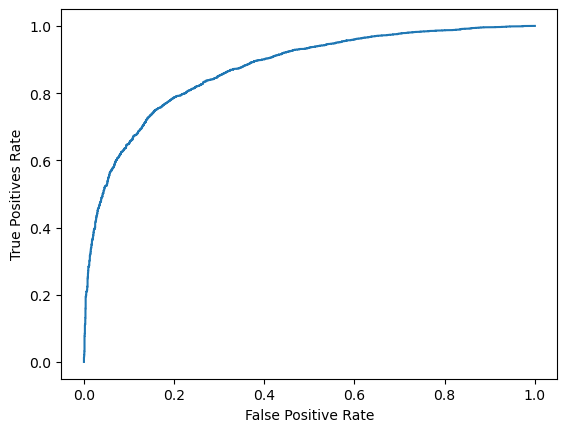

In [22]:
fpr, tpr, threshold = roc_curve(yval, ypred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

In [26]:
xtest = test_df['reviewText']
xtest_transformed = tfidf.transform(xtest)

In [27]:
preds = lr_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})
subdf.head(5)

,id,predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [28]:
subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/logistic_regression_preds_baseline2.csv', index=False)

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [22]:
dtc_params = {'criterion':['gini'], 'class_weight':['balanced'], 'max_depth':[None,2,4]}

grid_dtc_model = GridSearchCV(dtc, dtc_params,cv=5, scoring="f1_macro")
grid_dtc_model.fit(x_transformed,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'], 'criterion': ['gini'],
                         'max_depth': [None, 2, 4]},
             scoring='f1_macro')

In [23]:
print('Best Score : {}'.format(grid_dtc_model.best_score_))
print("Best Parameter : {}".format(grid_dtc_model.best_params_))

Best Score : 0.6548506976335741
Best Parameter : {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None}


In [25]:
print("\n",grid_dtc_model.cv_results_['params'])
print("\n",grid_dtc_model.cv_results_['mean_test_score'])


 [{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None}, {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2}, {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}]

 [0.6548507  0.58718441 0.57564601]


In [34]:
dtc_model = DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=None)
dtc_model.fit(xtrain, ytrain)

ypred = dtc_model.predict(xval)
ypred_proba = dtc_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred)

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

ROC AUC Score : 0.6634540676639314
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      2372
           1       0.73      0.72      0.73      3464

    accuracy                           0.67      5836
   macro avg       0.66      0.66      0.66      5836
weighted avg       0.68      0.67      0.68      5836



Text(0, 0.5, 'True Positives Rate')

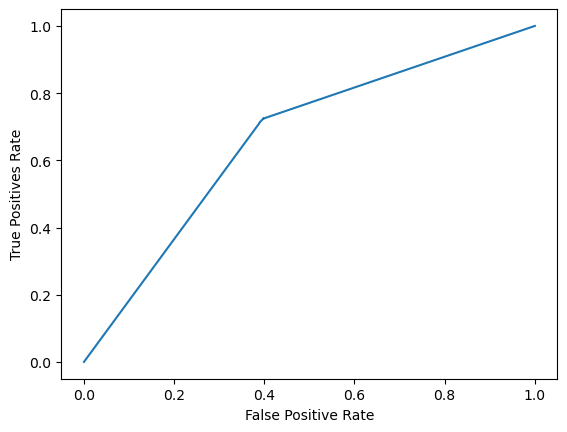

In [35]:
fpr, tpr, threshold = roc_curve(yval, ypred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

In [37]:
xtest = test_df['reviewText']
xtest_transformed = tfidf.transform(xtest)

In [38]:
preds = grid_dtc_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})
subdf.head(5)

,id,predicted
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [80]:
subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/decision_tree_baseline2.csv', index=False)

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced')

param_dist = {"n_estimators": [705,706,707],
              "max_depth": [13],
              "max_features": [12,12.1,12.2],
              "min_samples_split": [10,11,12],
              "min_samples_leaf": [3],
              "bootstrap": [True]}

random_rf_model = GridSearchCV(rfc, param_dist, cv=5, scoring="f1_macro")
random_rf_model.fit(x_transformed,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'bootstrap': [True], 'max_depth': [13],
                         'max_features': [12, 12.1, 12.2],
                         'min_samples_leaf': [3],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [705, 706, 707]},
             scoring='f1_macro')

In [27]:
print('Best Score : {}'.format(random_rf_model.best_score_))
print("Best Parameter : {}".format(random_rf_model.best_params_))

Best Score : 0.6887486796030549
Best Parameter : {'bootstrap': True, 'max_depth': 13, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 706}


In [28]:
print("\n",random_rf_model.cv_results_['params'])
print("\n",random_rf_model.cv_results_['mean_test_score'])


 [{'bootstrap': True, 'max_depth': 13, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 705}, {'bootstrap': True, 'max_depth': 13, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 706}, {'bootstrap': True, 'max_depth': 13, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 707}, {'bootstrap': True, 'max_depth': 13, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 11, 'n_estimators': 705}, {'bootstrap': True, 'max_depth': 13, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 11, 'n_estimators': 706}, {'bootstrap': True, 'max_depth': 13, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 11, 'n_estimators': 707}, {'bootstrap': True, 'max_depth': 13, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 705}, {'bootstrap': True, 'max_depth': 13, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_

In [41]:
rfc_model = RandomForestClassifier(n_estimators=705, class_weight='balanced', max_depth=13, max_features=12, min_samples_leaf=3,
                                  bootstrap=True, min_samples_split=10)
rfc_model.fit(xtrain, ytrain)

ypred = rfc_model.predict(xval)
ypred_proba = rfc_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred)

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

ROC AUC Score : 0.6931062063566864
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      2372
           1       0.74      0.77      0.76      3464

    accuracy                           0.71      5836
   macro avg       0.70      0.69      0.69      5836
weighted avg       0.71      0.71      0.71      5836



Text(0, 0.5, 'True Positives Rate')

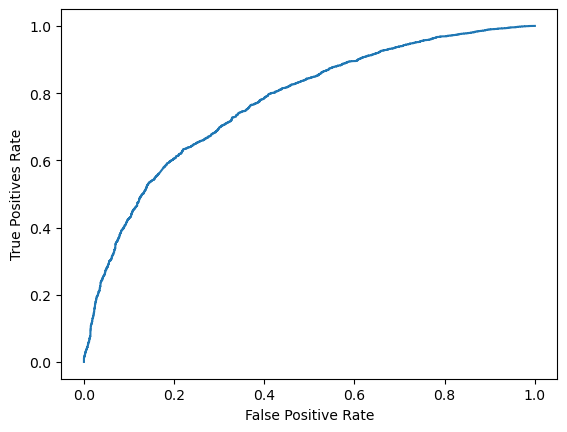

In [42]:
fpr, tpr, threshold = roc_curve(yval, ypred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

In [57]:
preds = random_rf_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})

subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/rf_baseline2.csv', index=False)